# Breast Cancer Winsconsin (BCW) Data Analysis

This notebook will analyse and clean the **Breast Cancer Winsconsin Data** for best usage in the algorithms comparison. The data was extracted from the [UCI repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) which we can also find some data information.

Now let's analyze, visualize and clean it.

## Dependencies

In [204]:
# Define the root path
import os
import sys
path = os.getcwd().split('tests')[0]
# Import the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set_style('darkgrid')
print(sns.__version__)

0.11.1


In [205]:
names = ['ID','target']
attributes = ['radius','texture','perimeter','area','smooth','compact','concavity','concave_pts','symmetry','fractal_dim']
stats = ['mean','std','worst']

for i in range(len(stats)):
    for j in range(len(attributes)):
        names.append(attributes[j]+'_'+stats[i])

df = pd.read_csv(path+'/data/raw/wdbc.data',names=names)
df.head()

,ID,target,radius_mean,texture_mean,perimeter_mean,area_mean,smooth_mean,compact_mean,concavity_mean,concave_pts_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smooth_worst,compact_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Samples and Attributes

In [206]:
print('Samples: {}'.format(df.shape[0]))
print('Attributes: {}'.format(df.shape[1]))

Samples: 569
Attributes: 32


## Let's analyze the information about the dataset

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                   569 non-null int64
target               569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smooth_mean          569 non-null float64
compact_mean         569 non-null float64
concavity_mean       569 non-null float64
concave_pts_mean     569 non-null float64
symmetry_mean        569 non-null float64
fractal_dim_mean     569 non-null float64
radius_std           569 non-null float64
texture_std          569 non-null float64
perimeter_std        569 non-null float64
area_std             569 non-null float64
smooth_std           569 non-null float64
compact_std          569 non-null float64
concavity_std        569 non-null float64
concave_pts_std      569 non-null float64
symmetry_std         569 non-null float64
fractal_dim_std 

Cool! There are no missing values and we have **30** functional attributes, **1** target column and **1** column for ID, in which we will drop in the future. So we have 10 attributes, which were calculated the mean, the standard deviation and trhe worst value. So for column 3-12 we have mean, 13 to 22 we have the standard deviation of the attributes, and finally 23 to 32 we have the wors values. So the features are:

### Numerical Features:
* `radius`: mean of distances from center to points on the perimeter
* `texture`: standard deviation of gray-scale values
* `perimeter`
* `area`
* `smoothness`: local variation in radius lengths
* `compactness`: perimeter^2 / area - 1.0
* `concavity`: severity of concave portions of the contour
* `concave points`: number of concave portions of the contour
* `symmetry`
* `fractal dimension`: "coastline approximation" - 1

### Categorical Feature
* `target`: types of cancer (M-malignant,B-benign)

## Let's analyze some data description

In [208]:
df.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smooth_mean,compact_mean,concavity_mean,concave_pts_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smooth_worst,compact_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We will now drop the ID column.

In [209]:
df = df.drop(['ID'],axis=1)


In [210]:
df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smooth_mean,compact_mean,concavity_mean,concave_pts_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smooth_worst,compact_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now we will analyze if there are duplicated values.

## Duplicated Values

In [211]:
duplicates = df.duplicated()

In [212]:
duplicates.value_counts()

False    569
dtype: int64

Cool! There are no duplicated values. Now we will transform the target dataset and transfer the `target` attribute from the begining to the end.

In [213]:
df_1 = df.replace({'target':{'M':1,'B':2}})
cols = df.columns.tolist()
cols = cols[1:] + [cols[0]]
df_1 = df_1[cols]
df_1

,radius_mean,texture_mean,perimeter_mean,area_mean,smooth_mean,compact_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean,...,texture_worst,perimeter_worst,area_worst,smooth_worst,compact_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,1
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,1
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,1
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,1
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,1
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,1
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,1
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,1
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,1
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,1


## Data Visualization

 First we will visualize the boxplot and the barplot of the attributes, so we can see if the distributions are to high, if so we must scale our dataset.

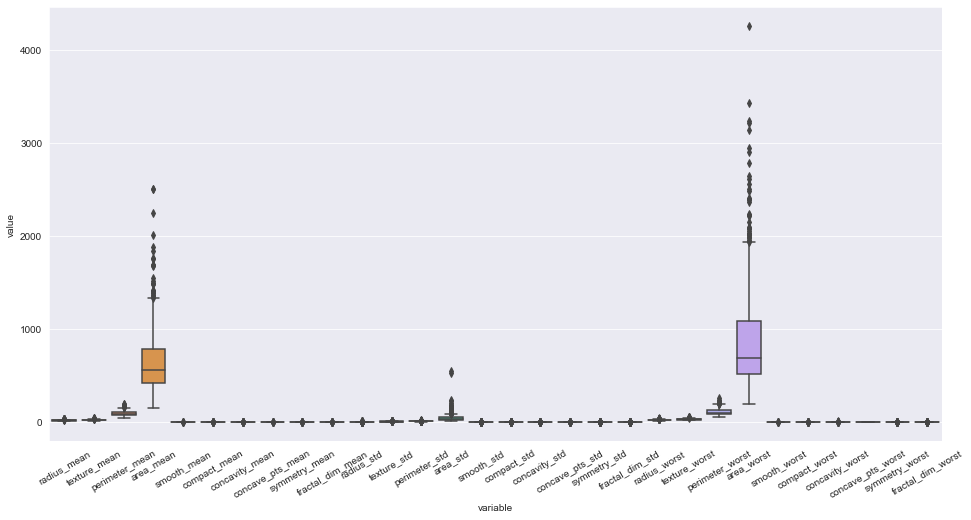

In [214]:
new_names = df_1.columns.values[:-1]

plt.figure(figsize=(16,8))
ax = sns.boxplot(x='variable',y='value',data=pd.melt(df_1[new_names]))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

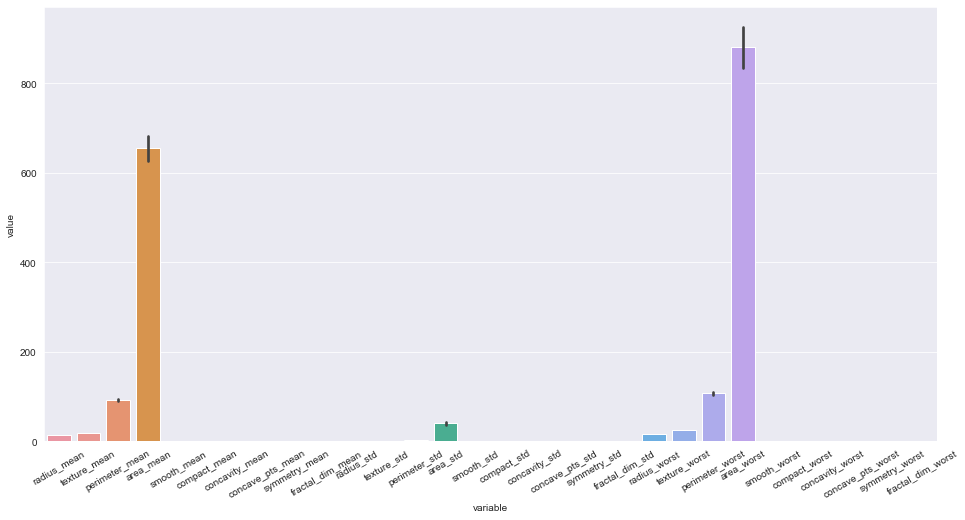

In [215]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x='variable',y='value',data=pd.melt(df_1[new_names]),ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

We can see that the attributes `area_mean` and `area_worst` has values that are higher than others attributes. Let's check the distribution.

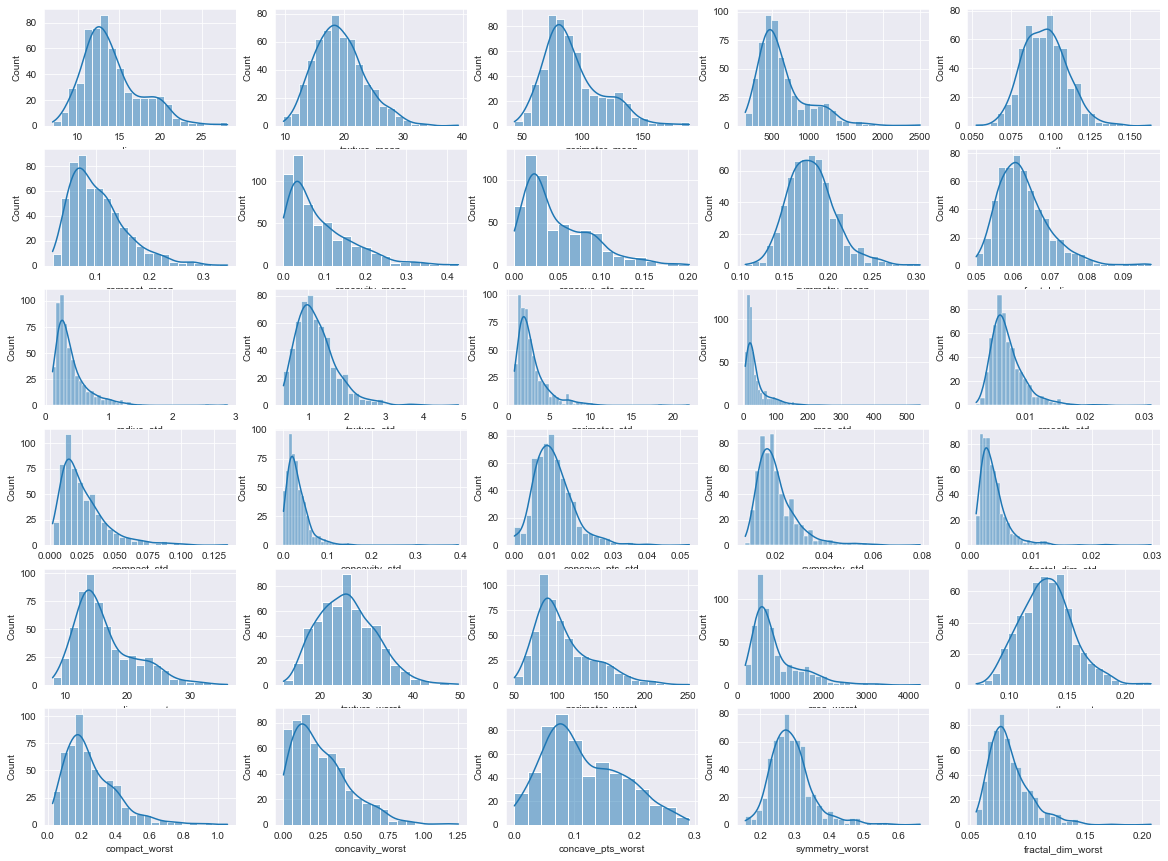

In [216]:
fig,ax=plt.subplots(6,5,figsize=(20,15))
for i in range(new_names.size):
    r = int(i/5)
    c = int(i-r*5)
    sns.histplot(data=df_1,x=new_names[i],kde=True,ax=ax[r,c])

There are some distributions that are closest to a **normal distribution**, but some are skewed, and we will calculate this assymetry.

In [217]:
skew = df_1.skew()
skew[skew>1].sort_values(ascending=False)

area_std             5.447186
concavity_std        5.110463
fractal_dim_std      3.923969
perimeter_std        3.443615
radius_std           3.088612
smooth_std           2.314450
symmetry_std         2.195133
compact_std          1.902221
area_worst           1.859373
fractal_dim_worst    1.662579
texture_std          1.646444
area_mean            1.645732
compact_worst        1.473555
concave_pts_std      1.444678
symmetry_worst       1.433928
concavity_mean       1.401180
fractal_dim_mean     1.304489
compact_mean         1.190123
concave_pts_mean     1.171180
concavity_worst      1.150237
perimeter_worst      1.128164
radius_worst         1.103115
dtype: float64

In [218]:
skew[skew>1].count()

22

In [219]:
skew[skew<-1].sort_values()

Series([], dtype: float64)

In [220]:
kurt = df_1.kurtosis()
kurt[kurt>3].sort_values(ascending=False)

area_std             49.209077
concavity_std        48.861395
fractal_dim_std      26.280847
perimeter_std        21.401905
radius_std           17.686726
smooth_std           10.469840
symmetry_std          7.896130
texture_std           5.349169
fractal_dim_worst     5.244611
concave_pts_std       5.126302
compact_std           5.106252
symmetry_worst        4.444560
area_worst            4.396395
area_mean             3.652303
compact_worst         3.039288
fractal_dim_mean      3.005892
dtype: float64

In [221]:
kurt[kurt>3].count()

16

So, we have for the seven highest **positive skewness**, also the same columns for the **positive kurtosis**, which are:
`area_std`, `concavity_std`, `fractal_dim_std`, `perimeter_std`, `radius_std`, `smooth_std` and `symmetry_std`. So they are assymetric and also very pointier.

Now we will check the outliers and correct this assymetry.

In [247]:
import scipy as sp

def mahalanobis(x):
    
    diff = x - x.mean()
    cov = x.cov().values
    try:
        chole = np.linalg.cholesky(cov)
    except:
        print("The covariance isn't symmentric neither positive definite")
    
    inv = sp.linalg.inv(cov)
    left = diff.values@inv
    mahal = left@diff.values.T
    return pd.DataFrame(mahal.diagonal(),columns=['mahalanobis'])

mahal = mahalanobis(df_1[df_1.columns.values[:-1]])
mahal

,mahalanobis
0,92.446392
1,36.336200
2,23.562786
3,112.187876
4,26.793749
5,15.140370
6,15.149797
7,21.617671
8,24.007065
9,143.793380


In [248]:
deg = df_1.shape[1]-1
deg

30

In [249]:
value = sp.stats.chi2.ppf((1-0.05),df=deg)
value

43.77297182574219

In [250]:
mahal[mahal['mahalanobis']>value]

,mahalanobis
0,92.446392
3,112.187876
9,143.793380
12,212.797724
24,50.286155
25,53.956678
26,48.562030
28,62.219242
31,73.481523
33,47.623066


In [251]:
inds = mahal[mahal['mahalanobis']>value].index
inds = list(inds)
df_out = df_1.loc[inds,df_1.columns.values]
df_out

,radius_mean,texture_mean,perimeter_mean,area_mean,smooth_mean,compact_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean,...,texture_worst,perimeter_worst,area_worst,smooth_worst,compact_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,1
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,1
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,1
12,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230,1
24,16.650,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,0.1995,0.06330,...,31.56,177.00,2215.0,0.18050,0.35780,0.46950,0.20950,0.3613,0.09564,1
25,17.140,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,...,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590,1
26,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,0.06924,...,33.21,122.40,896.9,0.15250,0.66430,0.55390,0.27010,0.4264,0.12750,1
28,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,36.71,149.30,1269.0,0.16410,0.61100,0.63350,0.20240,0.4027,0.09876,1
31,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,0.07799,...,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020,1
33,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,0.06261,...,30.90,161.40,1813.0,0.15090,0.65900,0.60910,0.17850,0.3672,0.11230,1


In [252]:
df_out_1 = df_out.loc[df_out['target']==1].shape[0]/df_1.loc[df_1['target']==1].shape[0]
df_out_1

0.29245283018867924

In [253]:
df_out_2 = df_out.loc[df_out['target']==2].shape[0]/df_1.loc[df_1['target']==2].shape[0]
df_out_2

0.08403361344537816

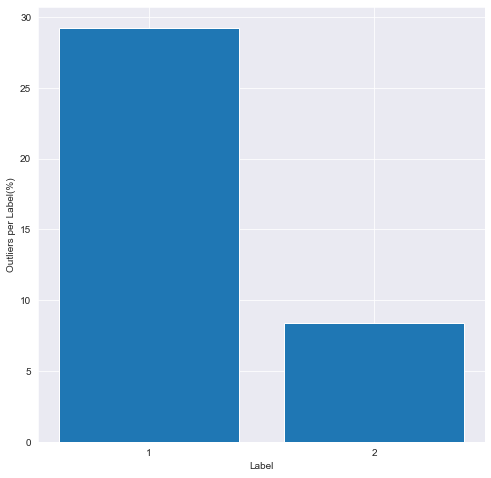

In [254]:
x = np.array([df_out_1, df_out_2])*100
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(np.arange(2)+1,x)
plt.xticks(np.arange(2)+1,('1','2'))
plt.ylabel('Outliers per Label(%)')
plt.xlabel('Label')
plt.show()

In [255]:
print("Label 1 - Outliers: {}".format(df_out.loc[df_out['target']==1].shape[0]))
print("Label 1 - Total: {}".format(df_1.loc[df_1['target']==1].shape[0]))
print("Label 2 - Outliers: {}".format(df_out.loc[df_out['target']==2].shape[0]))
print("Label 2 - Total: {}".format(df_1.loc[df_1['target']==2].shape[0]))

Label 1 - Outliers: 62
Label 1 - Total: 212
Label 2 - Outliers: 30
Label 2 - Total: 357


In [256]:
print("Imbalanced before: {}".format(df_1.loc[df_1['target']==2].shape[0]/df_1.loc[df_1['target']==1].shape[0]))
print("Imbalanced After: {}".format(327/150))
print("Imbalanced only label 1: {}".format(357/150))
print("Imbanlanced only label 2: {}".format(327/212))

Imbalanced before: 1.6839622641509433
Imbalanced After: 2.18
Imbalanced only label 1: 2.38
Imbanlanced only label 2: 1.5424528301886793


In [267]:
mahal = pd.concat([mahal[mahal['mahalanobis']>value],df_out['target']],axis=1)


In [268]:
mahal

,mahalanobis,target
0,92.446392,1
3,112.187876,1
9,143.793380,1
12,212.797724,1
24,50.286155,1
25,53.956678,1
26,48.562030,1
28,62.219242,1
31,73.481523,1
33,47.623066,1


In [269]:
mahal.loc[mahal['target']==1].sort_values(by='mahalanobis',ascending=False)

,mahalanobis,target
212,384.846821,1
461,300.475341,1
12,212.797724,1
213,195.188242,1
122,179.416440,1
38,167.047059,1
78,166.739192,1
265,144.457836,1
9,143.793380,1
190,136.802593,1


In [270]:
mahal.loc[mahal['target']==2].sort_values(by='mahalanobis',ascending=False)

,mahalanobis,target
152,407.885876,2
68,203.554599,2
290,198.696025,2
71,181.277654,2
192,179.755449,2
288,118.239736,2
314,107.112324,2
505,102.527952,2
504,90.212397,2
116,79.008219,2


So we will drop only the outliers of label 2.

In [171]:
inds = df_out[df_out['target']==2].index
inds
df_1 = df_1.drop(index=inds)
df_1 = df_1.reset_index(drop=True)
df_1

,radius_mean,texture_mean,perimeter_mean,area_mean,smooth_mean,compact_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean,...,texture_worst,perimeter_worst,area_worst,smooth_worst,compact_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,1
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,1
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,1
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,1
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,1
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440,1
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.25760,0.37840,0.19320,0.3063,0.08368,1
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.36820,0.26780,0.15560,0.3196,0.11510,1
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.54010,0.53900,0.20600,0.4378,0.10720,1
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.05800,1.10500,0.22100,0.4366,0.20750,1


In [172]:
df_1['target'].value_counts()

2    327
1    212
Name: target, dtype: int64

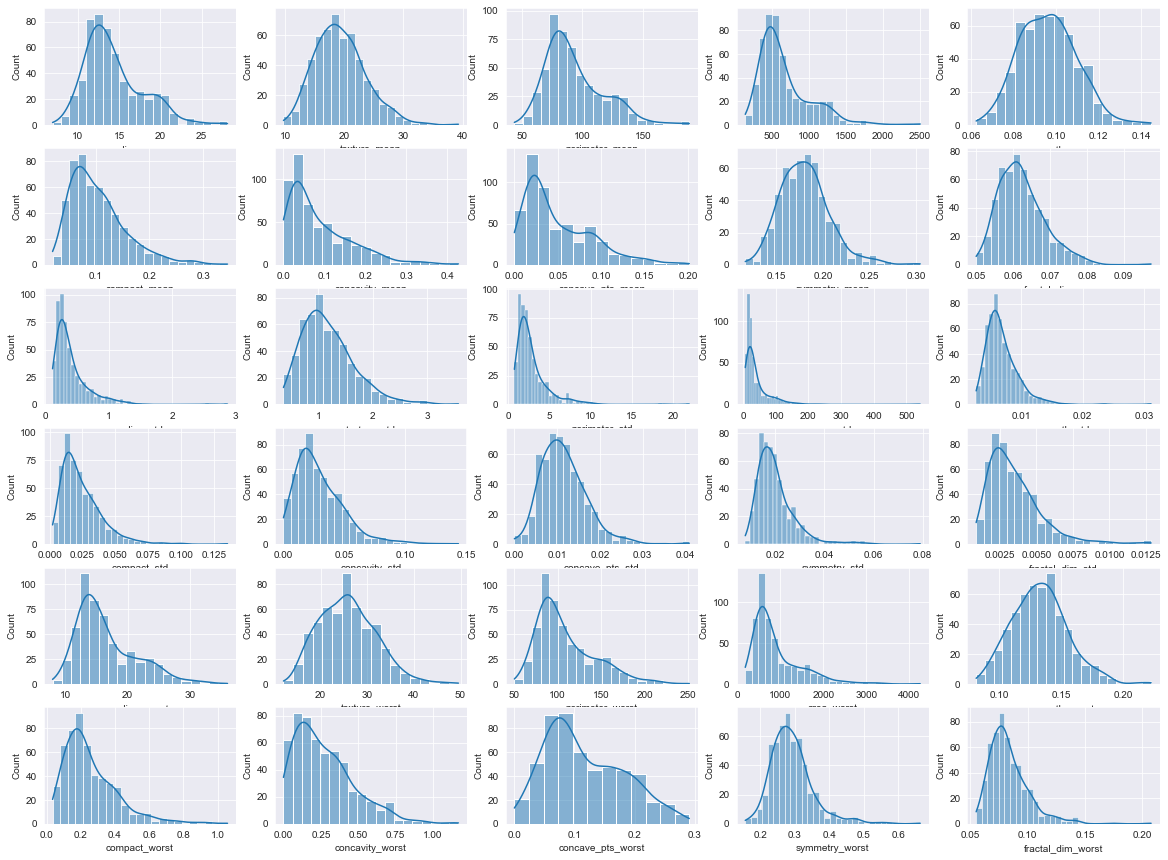

In [173]:
fig,ax= plt.subplots(6,5,figsize=(20,15))
for i in range(new_names.size):
    r = int(i/5)
    c = int(i-r*5)
    sns.histplot(data=df_1,x=new_names[i],kde=True,ax=ax[r,c])

In [174]:
skew = df_1.skew()
skew[skew>1].sort_values(ascending=False)

area_std             5.338043
perimeter_std        3.411853
radius_std           3.091271
smooth_std           2.497598
symmetry_std         2.346706
compact_std          1.952005
area_worst           1.828210
fractal_dim_worst    1.786644
fractal_dim_std      1.754175
area_mean            1.635783
compact_worst        1.531852
concavity_std        1.492749
symmetry_worst       1.478767
concavity_mean       1.390353
compact_mean         1.257899
concave_pts_mean     1.168036
concave_pts_std      1.127970
perimeter_worst      1.122831
radius_worst         1.097089
texture_std          1.091129
concavity_worst      1.081078
perimeter_mean       1.003410
dtype: float64

In [175]:
skew[skew<-1].sort_values()

Series([], dtype: float64)

In [176]:
kurt = df_1.kurtosis()
kurt[kurt>3].sort_values(ascending=False)

area_std             47.137016
perimeter_std        20.673997
radius_std           17.414584
smooth_std           14.474502
symmetry_std          9.370875
compact_std           6.768389
fractal_dim_worst     6.501363
fractal_dim_std       4.533864
symmetry_worst        4.512472
area_worst            4.229627
concavity_std         3.612335
area_mean             3.571847
compact_worst         3.243211
concave_pts_std       3.084127
dtype: float64

It's clear that the amount of assymetric attributes and pointy is a litte less without the outliers. Let's see the correlation.

(30, 0)

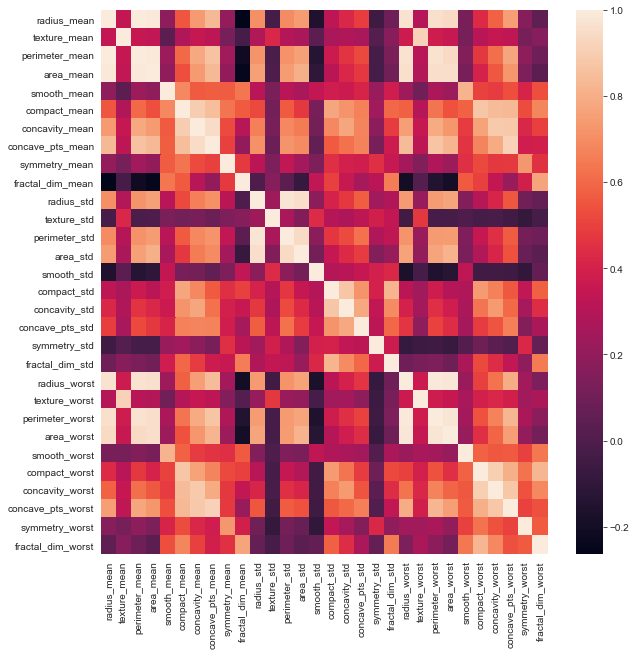

In [177]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_1[df_1.columns.values[:-1]].corr())
ax.set_ylim([30,0])

In [178]:
df_corr = pd.melt(df_1[df_1.columns.values[:-1]].corr())
df_corr['Var'] = pd.concat([pd.DataFrame(df_1.columns.values[:-1],columns=['Att'])]*df_1.shape[1], ignore_index=True)
df_corr

,variable,value,Var
0,radius_mean,1.000000,radius_mean
1,radius_mean,0.343371,texture_mean
2,radius_mean,0.997883,perimeter_mean
3,radius_mean,0.988119,area_mean
4,radius_mean,0.189804,smooth_mean
5,radius_mean,0.552398,compact_mean
6,radius_mean,0.741406,concavity_mean
7,radius_mean,0.836345,concave_pts_mean
8,radius_mean,0.205783,symmetry_mean
9,radius_mean,-0.262397,fractal_dim_mean


In [179]:
df_corr = df_corr.drop(index=df_corr[df_corr['variable']==df_corr['Var']].index)
df_corr = df_corr.reset_index(drop=True)
df_corr.sort_values(by='value',ascending=False).head(10)

,variable,value,Var
1,radius_mean,0.997883,perimeter_mean
58,perimeter_mean,0.997883,radius_mean
601,radius_worst,0.993746,perimeter_worst
658,perimeter_worst,0.993746,radius_worst
2,radius_mean,0.988119,area_mean
87,area_mean,0.988119,radius_mean
60,perimeter_mean,0.986949,area_mean
89,area_mean,0.986949,perimeter_mean
687,area_worst,0.984642,radius_worst
602,radius_worst,0.984642,area_worst


The highest correlations are `perimeter_mean` with `radius_mean`, `perimeter_worst` with `radius_worst`, `radius_mean` with `area_mean`, `perimeter_mean` with `area_mean`, and then `area_worst` with `radius_worst`. While the smallest are presented below:

In [180]:
df_corr.sort_values(by='value').head(10)

,variable,value,Var
8,radius_mean,-0.262397,fractal_dim_mean
261,fractal_dim_mean,-0.262397,radius_mean
95,area_mean,-0.245106,fractal_dim_mean
264,fractal_dim_mean,-0.245106,area_mean
263,fractal_dim_mean,-0.211207,perimeter_mean
66,perimeter_mean,-0.211207,fractal_dim_mean
589,radius_worst,-0.200204,fractal_dim_mean
280,fractal_dim_mean,-0.200204,radius_worst
676,area_worst,-0.191807,fractal_dim_mean
283,fractal_dim_mean,-0.191807,area_worst


Now let's do the PCA analysis.

In [181]:
# Let's see the data influence

df_scale = (df_1[df_1.columns.values[:-1]]-df_1[df_1.columns.values[:-1]].mean())/df_1[df_1.columns.values[:-1]].std()

pca = PCA()
x_pca = pca.fit_transform(df_scale)

var = pca.explained_variance_ratio_
cols = ['target']
cols = ["PC" + str(i+1) for i in range(30)] + cols
df_pca = pd.DataFrame(columns=cols)
df_pca = pd.concat([pd.DataFrame(x_pca,columns=["PC" + str(i+1) for i in range(30)]),df_1['target']],axis=1)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,target
0,9.290898,2.243222,-1.285644,4.133971,-0.551385,1.099157,2.057310,-0.229516,-0.027435,-0.787074,...,-0.268036,0.061726,-0.082243,-0.040414,-0.187175,-0.222889,-0.025714,0.049625,-0.046997,1
1,2.150900,-3.746224,-1.033677,0.875557,0.413630,-0.048128,0.096934,0.237706,1.242701,1.142850,...,0.100100,0.121875,-0.151849,-0.113076,-0.044423,0.143513,0.037509,-0.009742,-0.003757,1
2,5.735811,-0.948960,-0.683408,0.977931,-0.099009,0.475305,-0.679505,-0.043366,-0.044394,0.684667,...,0.135717,0.097764,0.188121,0.084134,-0.001992,0.039611,0.029627,0.005073,0.004073,1
3,7.725720,11.468298,-1.923607,1.284204,-2.033887,2.845208,1.320581,1.172791,1.278603,-0.894158,...,0.373488,0.233110,0.045332,-0.113347,-0.247518,0.168197,0.043342,-0.076720,-0.025827,1
4,3.988292,-2.069934,1.238906,2.849867,1.079140,-1.387228,-1.065229,0.644163,0.370613,0.605128,...,-0.018427,-0.131812,0.006200,0.088659,0.023129,0.036816,-0.025665,0.004989,0.020089,1


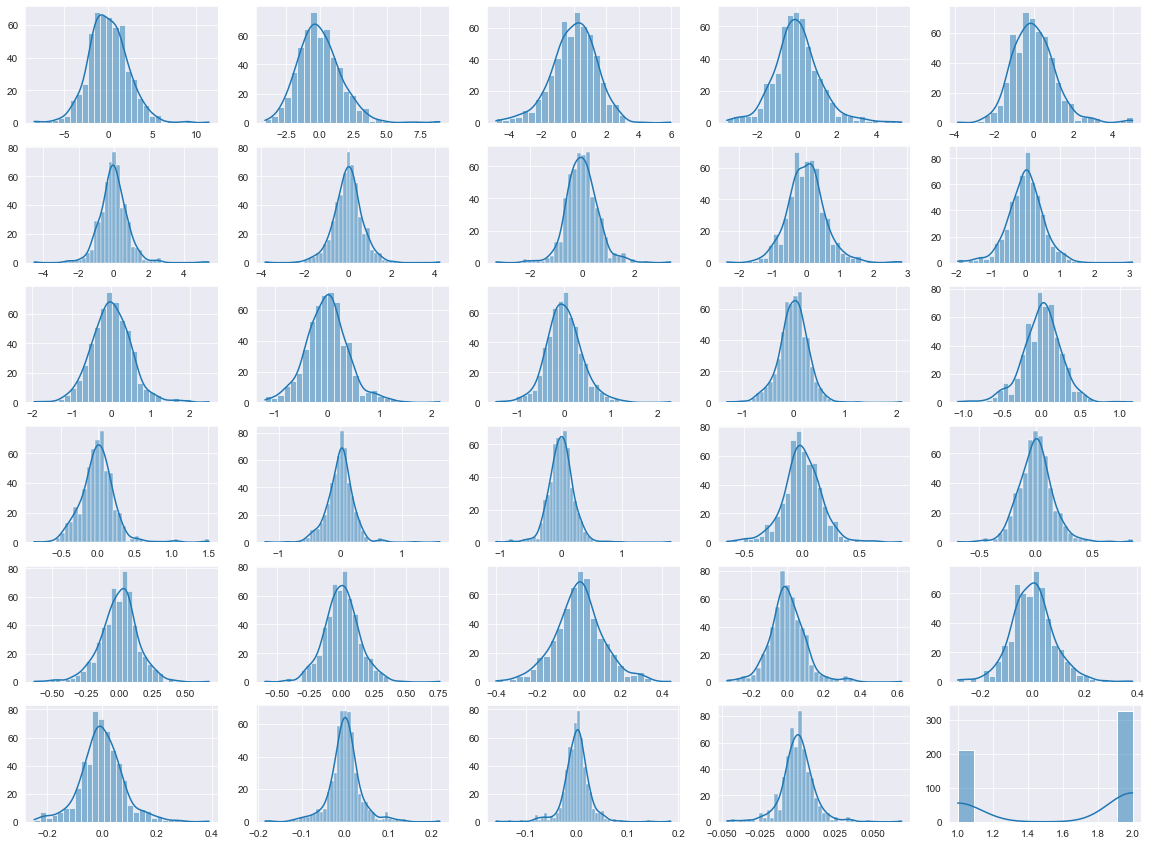

In [182]:
fig, axes = plt.subplots(6,5,figsize=(20,15))
for i in range(df_pca.columns.values[1:].size):
    r = int(i/5)
    c = int(i-5*r)
    g = sns.histplot(data=df_pca,x=df_pca.columns.values[i+1],kde=True,palette='coolwarm',ax=axes[r,c])
    g.set_xlabel('')
    g.set_ylabel('')

In [183]:
skew_pca = df_pca.skew()

In [184]:
skew_pca[skew_pca > 1].sort_values(ascending=False)

PC17    1.205717
PC1     1.057567
dtype: float64

In [185]:
skew_pca[skew_pca < -1].sort_values(ascending=False)

Series([], dtype: float64)

There are still some assymetric attributes, now let's see the kurtosis.

In [186]:
kurt_pca = df_pca.kurt()

In [187]:
kurt_pca.sort_values(ascending=False)

PC19      10.611721
PC29       9.073875
PC18       7.816771
PC7        7.176862
PC17       6.977827
PC15       5.390992
PC30       5.134412
PC28       4.933869
PC8        4.484431
PC25       3.983822
PC21       3.911691
PC9        3.862829
PC3        3.313282
PC11       3.017129
PC14       2.686890
PC6        2.655381
PC20       2.558090
PC10       2.421056
PC23       2.224246
PC16       2.114132
PC22       2.104407
PC27       2.035220
PC2        2.004020
PC5        1.936699
PC12       1.934227
PC13       1.871625
PC26       1.819025
PC4        1.022095
PC1        0.868723
PC24       0.844931
target    -1.814910
dtype: float64

Now let's check the distribution per label.

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, crest, crest_r, cubehelix, cubehelix_r, flag, flag_r, flare, flare_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

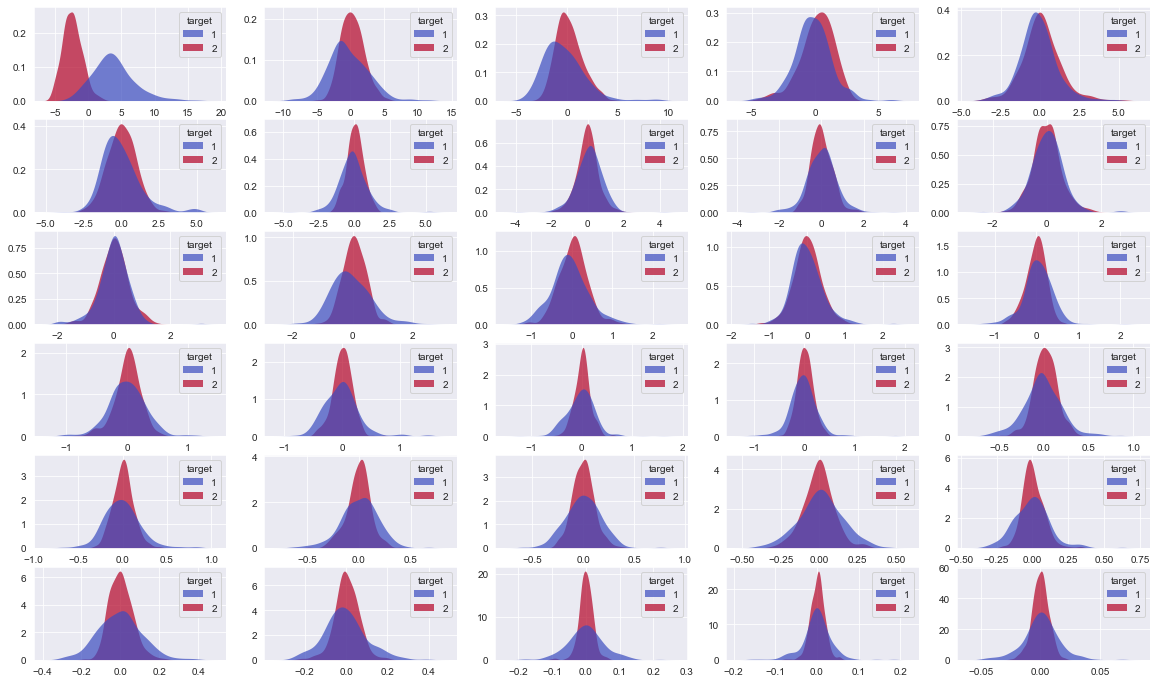

In [188]:
fig, axes = plt.subplots(6,5,figsize=(20,12))
for i in range(30):
    j = i+1
    r = int(abs(i/5))
    c = int(i-5*r)
    g = sns.kdeplot(data=df_pca,x=df_pca.columns.values[i],hue='target',fill=True, common_norm=False, palette="coolwarm",
   alpha=.7, linewidth=0,ax=axes[r,c])
    g.set_ylabel('')
    g.set_xlabel('')

Let's check the variance accumulation

In [189]:
cum_sum = np.cumsum(var)
cum_sum = pd.DataFrame(cum_sum, columns=['Value'], index=df_pca.columns.values[:-1])
cum_sum

,Value
PC1,0.474220
PC2,0.649263
PC3,0.740665
PC4,0.805349
PC5,0.852662
PC6,0.893795
PC7,0.917260
PC8,0.932827
PC9,0.945662
PC10,0.956244


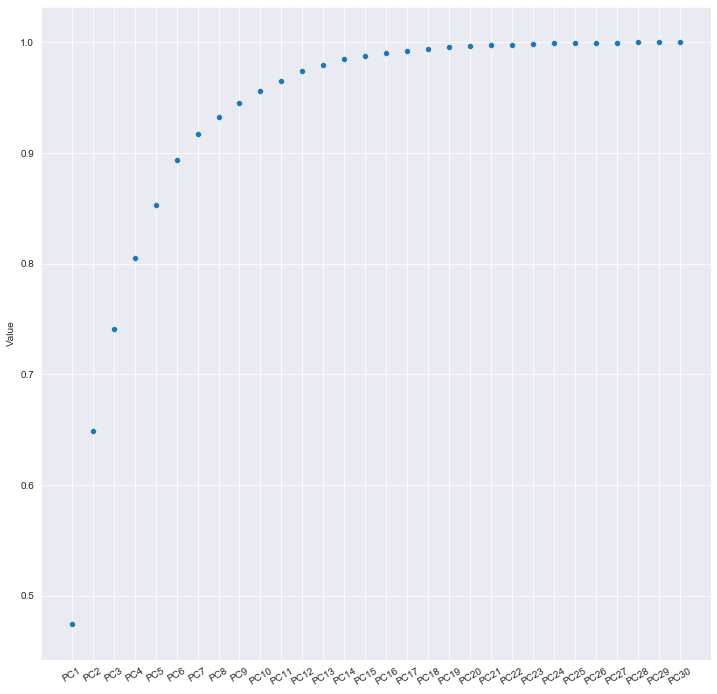

In [190]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(data=cum_sum, x=cum_sum.index, y='Value')
plt.setp(ax.get_xticklabels(), rotation=30);

In [191]:
index = np.where(cum_sum['Value']>0.99)[0][0]
index

15

In [192]:
df_pca = pd.concat([df_pca[df_pca.columns.values[:index+1]], df_pca['target']],axis=1)

In [193]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,target
0,9.290898,2.243222,-1.285644,4.133971,-0.551385,1.099157,2.057310,-0.229516,-0.027435,-0.787074,0.606068,-0.373963,-0.154143,1.067556,-0.446722,0.524537,1
1,2.150900,-3.746224,-1.033677,0.875557,0.413630,-0.048128,0.096934,0.237706,1.242701,1.142850,0.083988,-0.917227,-0.673456,-0.114946,-0.122395,-0.467877,1
2,5.735811,-0.948960,-0.683408,0.977931,-0.099009,0.475305,-0.679505,-0.043366,-0.044394,0.684667,-0.687173,-0.327209,0.230717,-0.141921,0.552627,0.469261,1
3,7.725720,11.468298,-1.923607,1.284204,-2.033887,2.845208,1.320581,1.172791,1.278603,-0.894158,-1.961820,-0.572682,0.049020,0.297501,-0.171629,0.262105,1
4,3.988292,-2.069934,1.238906,2.849867,1.079140,-1.387228,-1.065229,0.644163,0.370613,0.605128,0.489399,0.289962,-0.788719,0.052258,0.175318,-0.139001,1
5,2.504117,4.602264,-2.445726,1.180038,-0.632612,-0.703575,0.448018,-0.023016,0.123392,-0.471955,-0.017269,-0.026628,-0.102753,-0.082750,0.150560,-0.006708,1
6,2.000513,-2.537556,-1.978969,-0.032607,-0.324023,-0.225050,-0.302957,0.097293,0.273268,0.151339,-0.043354,-0.315612,-0.287222,-0.109264,-0.128121,-0.069099,1
7,2.246975,2.874939,-0.433836,0.044038,-1.096338,-1.423843,1.195313,-0.645017,0.070150,1.172500,0.038291,-0.433502,0.246002,0.118358,-0.164074,-0.230245,1
8,3.264056,4.034543,-2.673432,-0.308069,-1.526590,0.382119,-0.185466,-0.725877,-0.659805,0.030505,-0.251577,0.553371,0.231000,0.157617,0.090259,0.510161,1
9,7.004511,8.852295,-3.274703,-3.242911,2.563540,-0.445817,2.381593,0.904201,0.388095,-1.060495,0.933559,-0.767948,-0.259594,0.020579,1.226541,-1.075216,1


Finally, let's save the data.

In [194]:
df_pca.to_csv(path+'data/cleaned/bcw.csv', index=False)